# **Cumulative similarity distribution**

## **Configure the environment**

In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

### **Mount data sets**

In [ ]:
# For database in .csv

foodb = pd.read_csv('foodb_curated.csv')
unpda = pd.read_csv('unpda_curated.csv')
fda = pd.read_csv('fda_curated.csv')
purch = pd.read_csv('purch_curated.csv')

In [ ]:
foodb = foodb[['SMILES_chiral']]
unpda = unpda[['SMILES_chiral']]
fda = fda[['SMILES_chiral']]
purch = purch[['SMILES_chiral']]

#### **Random selection of a subset from FooDB**

In [ ]:
print(f'initial shape: {foodb.shape}')
foodb_1 = foodb.sample(n = 1000, random_state = 15)
foodb_1.reset_index(drop = True, inplace = True)
foodb = foodb.drop(foodb_1.index)
foodb.reset_index(drop = True, inplace = True)
print(f'first sample: {foodb.shape}')
foodb_2 = foodb.sample(n = 1000, random_state = 15)
foodb_2.reset_index(drop = True, inplace = True)
foodb = foodb.drop(foodb_2.index)
foodb.reset_index(drop = True, inplace = True)
print(f'second sample: {foodb.shape}')
foodb_3 = foodb.sample(n = 1000, random_state = 15)
foodb_3.reset_index(drop = True, inplace = True)
foodb = foodb.drop(foodb_3.index)
foodb.reset_index(drop = True, inplace = True)
print(f'third sample: {foodb.shape}')
foodb_4 = foodb.sample(n = 1000, random_state = 15)
foodb_4.reset_index(drop = True, inplace = True)
foodb = foodb.drop(foodb_4.index)
foodb.reset_index(drop = True, inplace = True)
print(f'fourth sample: {foodb.shape}')
foodb_5 = foodb.sample(n = 1000, random_state = 15)
foodb_5.reset_index(drop = True, inplace = True)
foodb = foodb.drop(foodb_5.index)
foodb.reset_index(drop = True, inplace = True)
print(f'fifth sample: {foodb.shape}')

initial shape: (68658, 1)
first sample: (67658, 1)
second sample: (66658, 1)
third sample: (65658, 1)
fourth sample: (64658, 1)
fifth sample: (63658, 1)


In [ ]:
foodb = pd.concat([foodb_1, foodb_2, foodb_3, foodb_4, foodb_5], ignore_index = True)

In [ ]:
print(foodb.shape)
foodb.tail(2)

(5000, 1)


,SMILES_chiral
4998,CCCCCC/C=C\CCCCCCCC(=O)OC[C@H](COC(=O)CCCCCCCC...
4999,CC(C)CCCCCCCCCCCCCCC(=O)OC[C@H](O)COC(=O)CCCCC...


In [ ]:
SMILES_foodb = list(foodb['SMILES_chiral'])
SMILES_unpda = list(unpda['SMILES_chiral'])
SMILES_fda = list(fda['SMILES_chiral'])
SMILES_purch = list(purch['SMILES_chiral'])

## **Functions defining**

In [ ]:
def MACCSkeys_fp (smi):
    fps = pd.DataFrame([[int(y) for y in MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(x)).ToBitString()] for x in smi])
    SimMat = 1 - pdist(fps[[x for x in range(167)]], metric="jaccard") # Similarity Matrix
    return SimMat

In [ ]:
def ECFP (smi, r):
    fps = pd.DataFrame([[int(y) for y in AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), r, nBits=1024).ToBitString()] for x in smi])
    SimMat = 1 - pdist(fps[[x for x in range(1024)]], metric="jaccard") # Similarity Matrix
    return SimMat

## **Apply functions and sort results**

In [ ]:
SimMACCS_foodb = np.sort(MACCSkeys_fp(SMILES_foodb))
SimMACCS_unpda = np.sort(MACCSkeys_fp(SMILES_unpda))
SimMACCS_fda = np.sort(MACCSkeys_fp(SMILES_fda))
SimMACCS_purch = np.sort(MACCSkeys_fp(SMILES_purch))

In [ ]:
SimECFP4_foodb = np.sort(ECFP(SMILES_foodb, 2))
SimECFP4_unpda = np.sort(ECFP(SMILES_unpda, 2))
SimECFP4_fda = np.sort(ECFP(SMILES_fda, 2))
SimECFP4_purch = np.sort(ECFP(SMILES_purch, 2))

In [ ]:
SimECFP6_foodb = np.sort(ECFP(SMILES_foodb, 3))
SimECFP6_unpda = np.sort(ECFP(SMILES_unpda, 3))
SimECFP6_fda = np.sort(ECFP(SMILES_fda, 3))
SimECFP6_purch = np.sort(ECFP(SMILES_purch, 3))

In [ ]:
# calculate the proportional values of samples for MACCS keys
proportionMACCS_foodb = 1. * np.arange(len(SimMACCS_foodb)) / (len(SimMACCS_foodb) - 1)
print(len(proportionMACCS_foodb))
proportionMACCS_unpda = 1. * np.arange(len(SimMACCS_unpda)) / (len(SimMACCS_unpda) - 1)
print(len(proportionMACCS_unpda))
proportionMACCS_fda = 1. * np.arange(len(SimMACCS_fda)) / (len(SimMACCS_fda) - 1)
print(len(proportionMACCS_fda))
proportionMACCS_purch = 1. * np.arange(len(SimMACCS_purch)) / (len(SimMACCS_purch) - 1)
print(len(proportionMACCS_purch))

12497500
112402521
2699326
5542785


In [ ]:
# calculate the proportional values of samples for ECFP4 y ECFP6
proportionECFP_foodb = 1. * np.arange(len(SimECFP4_foodb)) / (len(SimECFP4_foodb) - 1)
print(len(proportionECFP_foodb))
proportionECFP_unpda = 1. * np.arange(len(SimECFP4_unpda)) / (len(SimECFP4_unpda) - 1)
print(len(proportionECFP_unpda))
proportionECFP_fda = 1. * np.arange(len(SimECFP4_fda)) / (len(SimECFP4_fda) - 1)
print(len(proportionECFP_fda))
proportionECFP_purch = 1. * np.arange(len(SimECFP4_purch)) / (len(SimECFP4_purch) - 1)
print(len(proportionECFP_purch))

12497500
112402521
2699326
5542785


### **Plot results**

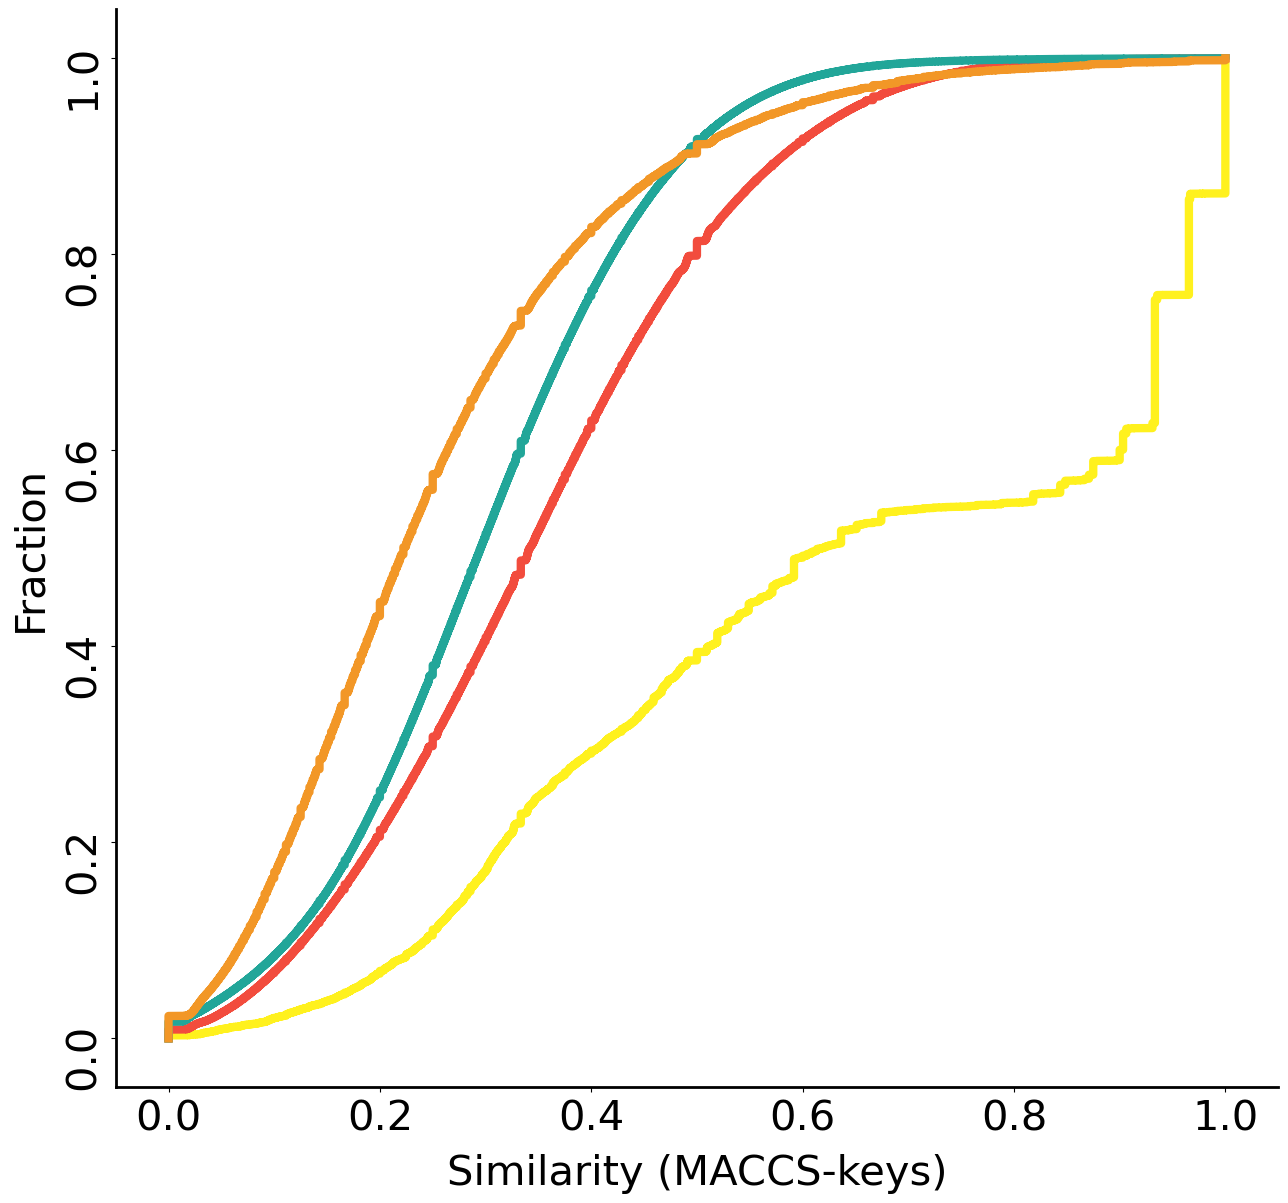

In [ ]:
# Figure 1 - MACCSkeys
plt.figure(figsize=(15, 14))
plt.plot(SimMACCS_foodb, proportionMACCS_foodb, label="FooDB", c="#FFF11E", lw = 6)
plt.plot(SimMACCS_unpda, proportionMACCS_unpda, label="UNPD-A", c="#F24C3D", lw = 6)
plt.plot(SimMACCS_fda, proportionMACCS_fda, label="FDA", c="#22A699", lw = 6)
plt.plot(SimMACCS_purch, proportionMACCS_purch, label="FooDB commercially available", c="#F29727", lw = 6)

plt.xlabel('Similarity (MACCS-keys)', fontsize=30, labelpad = 10)
plt.ylabel('Fraction', fontsize=30, labelpad = 10)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(2.0)

ax.tick_params(axis='both', which='major', pad=5)

plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=90, fontsize=30)

# ax1.legend(loc='lower center', ncol=2, fancybox=True, shadow=True)
plt.savefig("similarity_maccs.jpg", bbox_inches='tight', dpi=300)
plt.show()

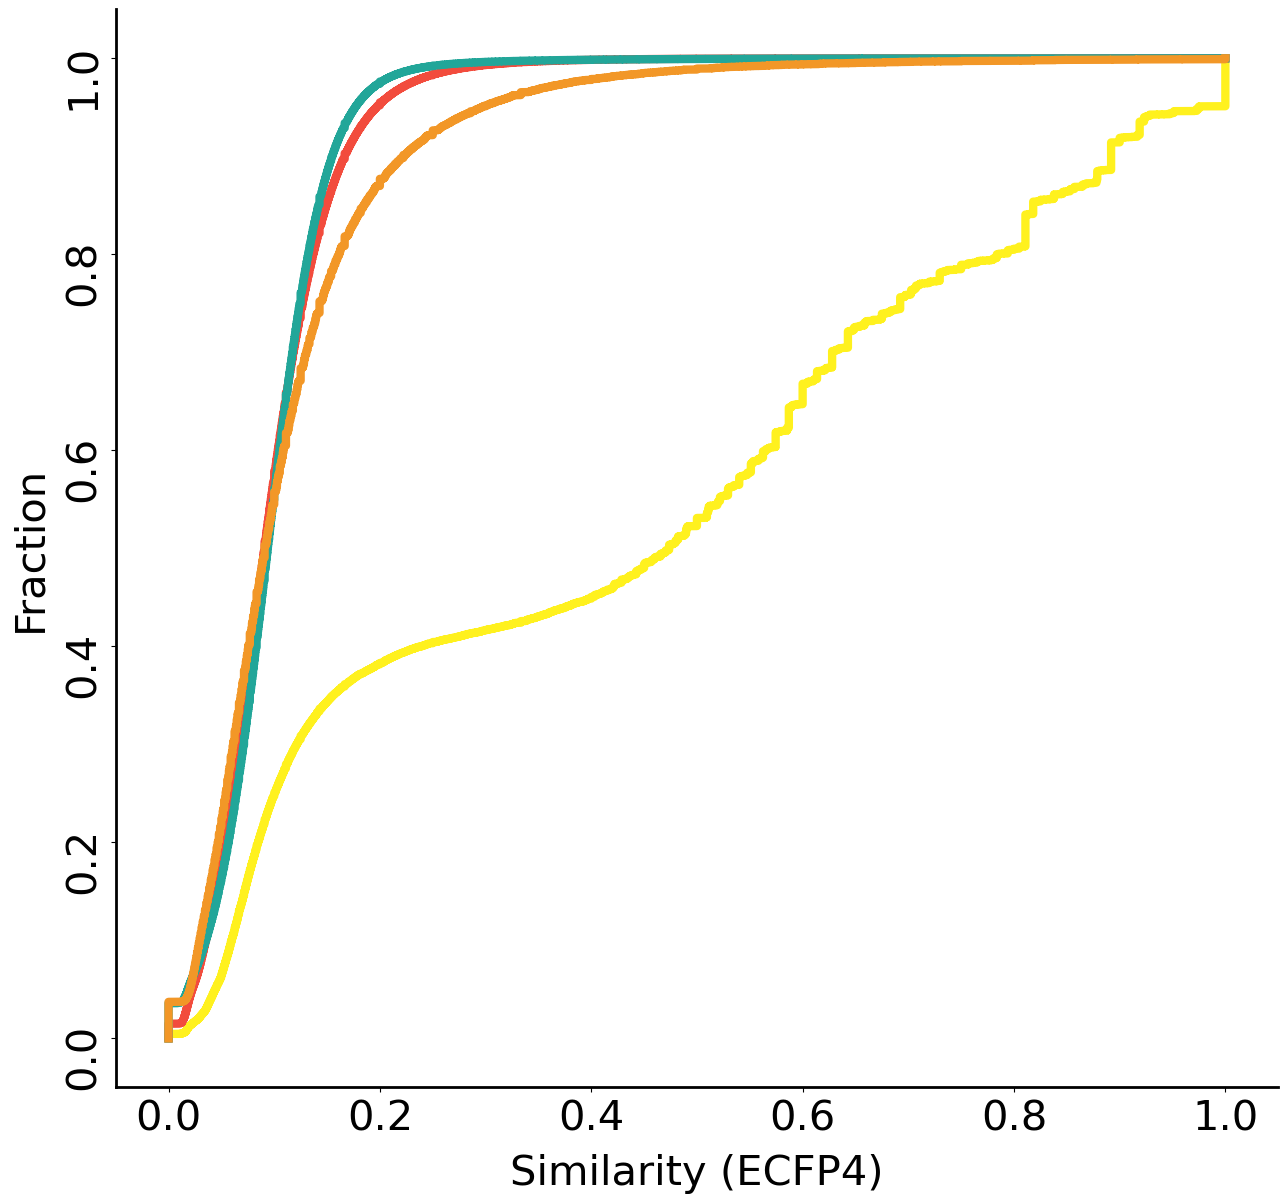

In [ ]:
# Figure 2 - ECFP4
plt.figure(figsize=(15, 14))
plt.plot(SimECFP4_foodb, proportionECFP_foodb, label="FooDB", c="#FFF11E", lw = 6)
plt.plot(SimECFP4_unpda, proportionECFP_unpda, label="UNPD-A", c="#F24C3D", lw = 6)
plt.plot(SimECFP4_fda, proportionECFP_fda, label="FDA", c="#22A699", lw = 6)
plt.plot(SimECFP4_purch, proportionECFP_purch, label="FooDB commercially available", c="#F29727", lw = 6)

plt.xlabel('Similarity (ECFP4)', fontsize=30, labelpad = 10)
plt.ylabel('Fraction', fontsize=30, labelpad = 10)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(2.0)

ax.tick_params(axis='both', which='major', pad=5)

plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=90, fontsize=30)

# ax1.legend(loc='lower center', ncol=2, fancybox=True, shadow=True)
plt.savefig("similarity_ecfp4.jpg", bbox_inches='tight', dpi=300)
plt.show()

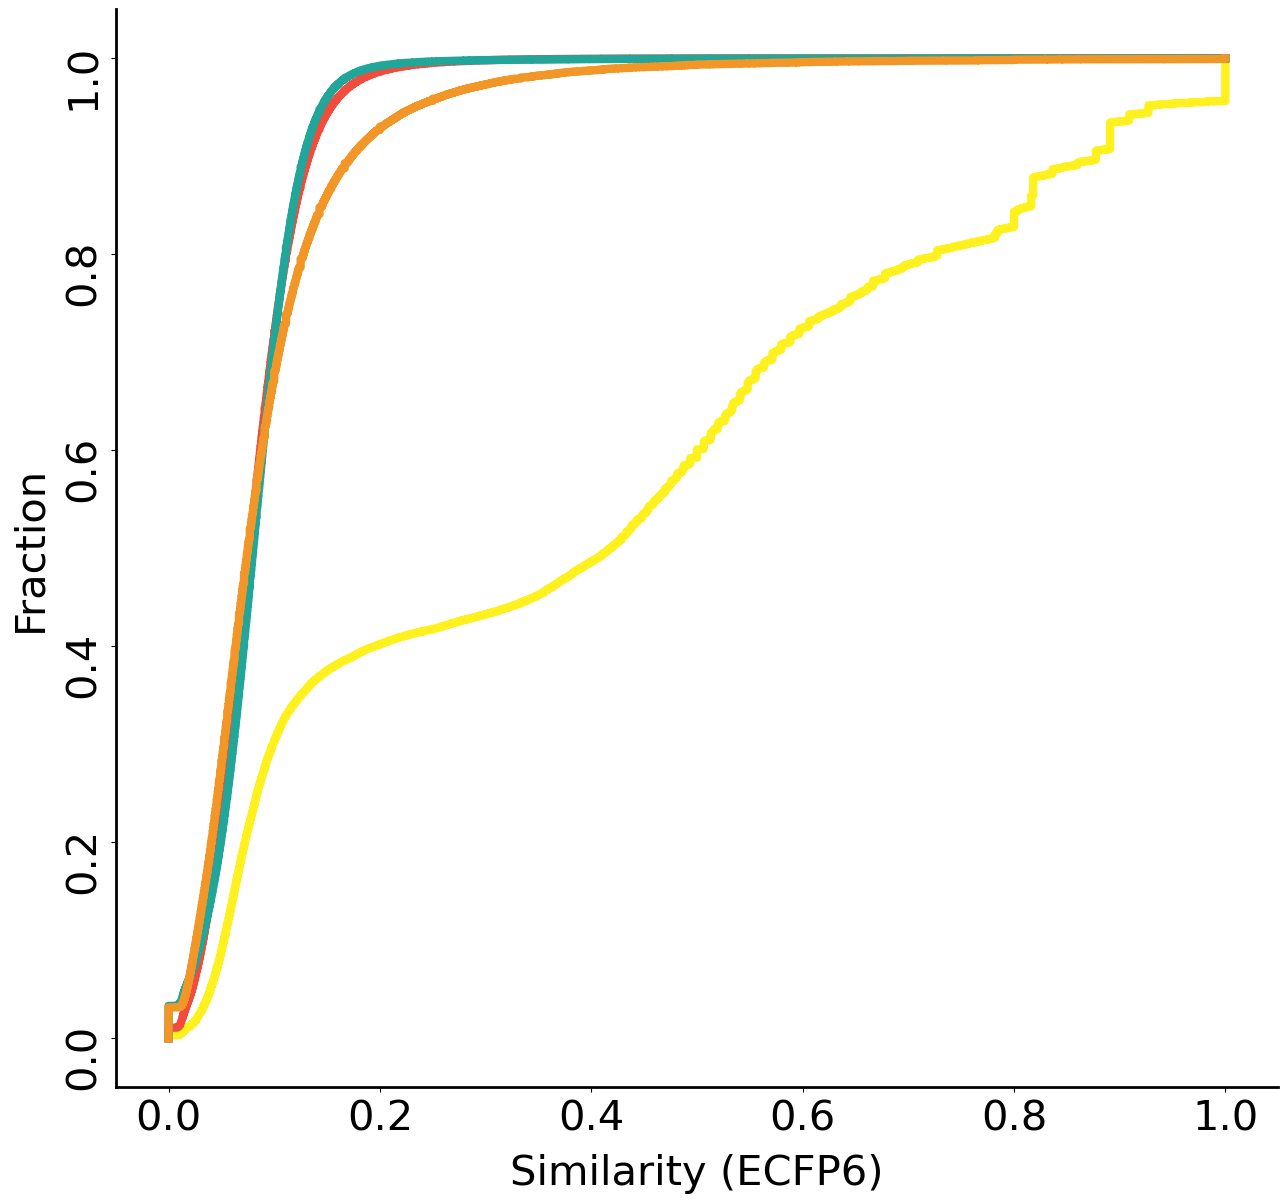

In [ ]:
# Figure 3 - ECFP6
plt.figure(figsize=(15, 14))
plt.plot(SimECFP6_foodb, proportionECFP_foodb, label="FooDB", c="#FFF11E", lw = 6)
plt.plot(SimECFP6_unpda, proportionECFP_unpda, label="UNPD-A", c="#F24C3D", lw = 6)
plt.plot(SimECFP6_fda, proportionECFP_fda, label="FDA", c="#22A699", lw = 6)
plt.plot(SimECFP6_purch, proportionECFP_purch, label="FooDB commercially available", c="#F29727", lw = 6)

plt.xlabel('Similarity (ECFP6)', fontsize=30, labelpad = 10)
plt.ylabel('Fraction', fontsize=30, labelpad = 10)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(2.0)

ax.tick_params(axis='both', which='major', pad=5)

plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=90, fontsize=30)

# ax1.legend(loc='lower center', ncol=2, fancybox=True, shadow=True)
plt.savefig("similarity_ecfp6.jpg", bbox_inches='tight', dpi=300)
plt.show()

## **Compute stats**

In [ ]:
#MACCS-keys statistics
maccs_foodb = pd.DataFrame(SimMACCS_foodb, columns = ['MACCS_foodb'])
maccs_foodb = maccs_foodb.describe()

maccs_unpda = pd.DataFrame(SimMACCS_unpda, columns = ['MACCS_unpda'])
maccs_unpda = maccs_unpda.describe()

maccs_fda = pd.DataFrame(SimMACCS_fda, columns = ['MACCS_fda'])
maccs_fda = maccs_fda.describe()

maccs_purch = pd.DataFrame(SimMACCS_purch, columns = ['MACCS_purch'])
maccs_purch = maccs_purch.describe()

#ECFP4 statistics
ecfp4_foodb = pd.DataFrame(SimECFP4_foodb, columns = ['ECFP4_foodb'])
ecfp4_foodb = ecfp4_foodb.describe()

ecfp4_unpda = pd.DataFrame(SimECFP4_unpda, columns = ['ECFP4_unpda'])
ecfp4_unpda = ecfp4_unpda.describe()

ecfp4_fda = pd.DataFrame(SimECFP4_fda, columns = ['ECFP4_fda'])
ecfp4_fda = ecfp4_fda.describe()

ecfp4_purch = pd.DataFrame(SimECFP4_purch, columns = ['ECFP4_purch'])
ecfp4_purch = ecfp4_purch.describe()

#ECFP6 statistics
ecfp6_foodb = pd.DataFrame(SimECFP6_foodb, columns = ['ECFP6_foodb'])
ecfp6_foodb = ecfp6_foodb.describe()

ecfp6_unpda = pd.DataFrame(SimECFP6_unpda, columns = ['ECFP6_unpda'])
ecfp6_unpda = ecfp6_unpda.describe()

ecfp6_fda = pd.DataFrame(SimECFP6_fda, columns = ['ECFP6_fda'])
ecfp6_fda = ecfp6_fda.describe()

ecfp6_purch = pd.DataFrame(SimECFP6_purch, columns = ['ECFP6_purch'])
ecfp6_purch = ecfp6_purch.describe()

data = pd.concat([maccs_foodb, maccs_unpda, maccs_fda, maccs_purch,
                 ecfp4_foodb, ecfp4_unpda, ecfp4_fda, ecfp4_purch,
                  ecfp6_foodb, ecfp6_unpda, ecfp6_fda, ecfp6_purch
                 ], axis = 1)

In [ ]:
data = data.round(3)

In [ ]:
data

,MACCS_foodb,MACCS_unpda,MACCS_fda,MACCS_purch,ECFP4_foodb,ECFP4_unpda,ECFP4_fda,ECFP4_purch,ECFP6_foodb,ECFP6_unpda,ECFP6_fda,ECFP6_purch
count,1.249750e+07,1.124025e+08,2699326.000,5542785.000,1.249750e+07,1.124025e+08,2699326.000,5542785.000,1.249750e+07,1.124025e+08,2699326.000,5542785.000
mean,6.450000e-01,3.500000e-01,0.300,0.256,4.370000e-01,9.800000e-02,0.096,0.115,4.030000e-01,8.100000e-02,0.081,0.094
std,3.060000e-01,1.720000e-01,0.144,0.172,3.200000e-01,5.700000e-02,0.051,0.101,3.130000e-01,4.300000e-02,0.042,0.085
min,0.000000e+00,0.000000e+00,0.000,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000000e+00,0.000000e+00,0.000,0.000
25%,3.540000e-01,2.220000e-01,0.200,0.132,1.000000e-01,6.000000e-02,0.065,0.054,8.400000e-02,5.300000e-02,0.056,0.047
50%,6.190000e-01,3.410000e-01,0.295,0.222,4.740000e-01,9.100000e-02,0.094,0.091,4.180000e-01,7.700000e-02,0.080,0.075
75%,9.330000e-01,4.640000e-01,0.395,0.343,6.920000e-01,1.270000e-01,0.124,0.143,6.400000e-01,1.040000e-01,0.104,0.115
max,1.000000e+00,1.000000e+00,1.000,1.000,1.000000e+00,1.000000e+00,1.000,1.000,1.000000e+00,1.000000e+00,1.000,1.000


In [ ]:
data.to_csv("similarity_maccs_ecfp.csv", index=True)

In [ ]:
statistics = pd.read_csv("similarity_maccs_ecfp.csv")
statistics

,Unnamed: 0,MACCS_foodb,MACCS_unpda,MACCS_fda,MACCS_purch,ECFP4_foodb,ECFP4_unpda,ECFP4_fda,ECFP4_purch,ECFP6_foodb,ECFP6_unpda,ECFP6_fda,ECFP6_purch
0,count,1.249750e+07,1.124025e+08,2699326.000,5542785.000,1.249750e+07,1.124025e+08,2699326.000,5542785.000,1.249750e+07,1.124025e+08,2699326.000,5542785.000
1,mean,6.450000e-01,3.500000e-01,0.300,0.256,4.370000e-01,9.800000e-02,0.096,0.115,4.030000e-01,8.100000e-02,0.081,0.094
2,std,3.060000e-01,1.720000e-01,0.144,0.172,3.200000e-01,5.700000e-02,0.051,0.101,3.130000e-01,4.300000e-02,0.042,0.085
3,min,0.000000e+00,0.000000e+00,0.000,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000000e+00,0.000000e+00,0.000,0.000
4,25%,3.540000e-01,2.220000e-01,0.200,0.132,1.000000e-01,6.000000e-02,0.065,0.054,8.400000e-02,5.300000e-02,0.056,0.047
5,50%,6.190000e-01,3.410000e-01,0.295,0.222,4.740000e-01,9.100000e-02,0.094,0.091,4.180000e-01,7.700000e-02,0.080,0.075
6,75%,9.330000e-01,4.640000e-01,0.395,0.343,6.920000e-01,1.270000e-01,0.124,0.143,6.400000e-01,1.040000e-01,0.104,0.115
7,max,1.000000e+00,1.000000e+00,1.000,1.000,1.000000e+00,1.000000e+00,1.000,1.000,1.000000e+00,1.000000e+00,1.000,1.000


In [ ]:
statistics.columns

Index(['Unnamed: 0', 'MACCS_foodb', 'MACCS_unpda', 'MACCS_fda', 'MACCS_purch',
       'ECFP4_foodb', 'ECFP4_unpda', 'ECFP4_fda', 'ECFP4_purch', 'ECFP6_foodb',
       'ECFP6_unpda', 'ECFP6_fda', 'ECFP6_purch'],
      dtype='object')

In [ ]:
statistics.columns = [
                    'statistics', 'MACCS_foodb', 'MACCS_unpda', 'MACCS_fda', 'MACCS_purch',
       'ECFP4_foodb', 'ECFP4_unpda', 'ECFP4_fda', 'ECFP4_purch', 'ECFP6_foodb',
       'ECFP6_unpda', 'ECFP6_fda', 'ECFP6_purch'
                    ]

In [ ]:
statistics

,statistics,MACCS_foodb,MACCS_unpda,MACCS_fda,MACCS_purch,ECFP4_foodb,ECFP4_unpda,ECFP4_fda,ECFP4_purch,ECFP6_foodb,ECFP6_unpda,ECFP6_fda,ECFP6_purch
0,count,1.249750e+07,1.124025e+08,2699326.000,5542785.000,1.249750e+07,1.124025e+08,2699326.000,5542785.000,1.249750e+07,1.124025e+08,2699326.000,5542785.000
1,mean,6.450000e-01,3.500000e-01,0.300,0.256,4.370000e-01,9.800000e-02,0.096,0.115,4.030000e-01,8.100000e-02,0.081,0.094
2,std,3.060000e-01,1.720000e-01,0.144,0.172,3.200000e-01,5.700000e-02,0.051,0.101,3.130000e-01,4.300000e-02,0.042,0.085
3,min,0.000000e+00,0.000000e+00,0.000,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000000e+00,0.000000e+00,0.000,0.000
4,25%,3.540000e-01,2.220000e-01,0.200,0.132,1.000000e-01,6.000000e-02,0.065,0.054,8.400000e-02,5.300000e-02,0.056,0.047
5,50%,6.190000e-01,3.410000e-01,0.295,0.222,4.740000e-01,9.100000e-02,0.094,0.091,4.180000e-01,7.700000e-02,0.080,0.075
6,75%,9.330000e-01,4.640000e-01,0.395,0.343,6.920000e-01,1.270000e-01,0.124,0.143,6.400000e-01,1.040000e-01,0.104,0.115
7,max,1.000000e+00,1.000000e+00,1.000,1.000,1.000000e+00,1.000000e+00,1.000,1.000,1.000000e+00,1.000000e+00,1.000,1.000


In [ ]:
stat = list(statistics["statistics"])

In [ ]:
array = statistics.to_numpy()
print(array)

[['count' 12497500.0 112402521.0 2699326.0 5542785.0 12497500.0
  112402521.0 2699326.0 5542785.0 12497500.0 112402521.0 2699326.0
  5542785.0]
 ['mean' 0.645 0.35 0.3 0.256 0.437 0.098 0.096 0.115 0.403 0.081 0.081
  0.094]
 ['std' 0.306 0.172 0.144 0.172 0.32 0.057 0.051 0.101 0.313 0.043 0.042
  0.085]
 ['min' 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 ['25%' 0.354 0.222 0.2 0.132 0.1 0.06 0.065 0.054 0.084 0.053 0.056
  0.047]
 ['50%' 0.619 0.341 0.295 0.222 0.474 0.091 0.094 0.091 0.418 0.077 0.08
  0.075]
 ['75%' 0.933 0.464 0.395 0.343 0.692 0.127 0.124 0.143 0.64 0.104 0.104
  0.115]
 ['max' 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]]


In [ ]:
array = np.transpose(array)
print(array)

[['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']
 [12497500.0 0.645 0.306 0.0 0.354 0.619 0.933 1.0]
 [112402521.0 0.35 0.172 0.0 0.222 0.341 0.464 1.0]
 [2699326.0 0.3 0.144 0.0 0.2 0.295 0.395 1.0]
 [5542785.0 0.256 0.172 0.0 0.132 0.222 0.343 1.0]
 [12497500.0 0.437 0.32 0.0 0.1 0.474 0.692 1.0]
 [112402521.0 0.098 0.057 0.0 0.06 0.091 0.127 1.0]
 [2699326.0 0.096 0.051 0.0 0.065 0.094 0.124 1.0]
 [5542785.0 0.115 0.101 0.0 0.054 0.091 0.143 1.0]
 [12497500.0 0.403 0.313 0.0 0.084 0.418 0.64 1.0]
 [112402521.0 0.081 0.043 0.0 0.053 0.077 0.104 1.0]
 [2699326.0 0.081 0.042 0.0 0.056 0.08 0.104 1.0]
 [5542785.0 0.094 0.085 0.0 0.047 0.075 0.115 1.0]]


In [ ]:
df = pd.DataFrame(array, columns=stat)
df

,count,mean,std,min,25%,50%,75%,max
0,count,mean,std,min,25%,50%,75%,max
1,12497500.0,0.645,0.306,0.0,0.354,0.619,0.933,1.0
2,112402521.0,0.35,0.172,0.0,0.222,0.341,0.464,1.0
3,2699326.0,0.3,0.144,0.0,0.2,0.295,0.395,1.0
4,5542785.0,0.256,0.172,0.0,0.132,0.222,0.343,1.0
5,12497500.0,0.437,0.32,0.0,0.1,0.474,0.692,1.0
6,112402521.0,0.098,0.057,0.0,0.06,0.091,0.127,1.0
7,2699326.0,0.096,0.051,0.0,0.065,0.094,0.124,1.0
8,5542785.0,0.115,0.101,0.0,0.054,0.091,0.143,1.0
9,12497500.0,0.403,0.313,0.0,0.084,0.418,0.64,1.0


In [ ]:
df2 = df.iloc[1:]
df2 = df2.reset_index(drop=True)
df2

,count,mean,std,min,25%,50%,75%,max
0,12497500.0,0.645,0.306,0.0,0.354,0.619,0.933,1.0
1,112402521.0,0.35,0.172,0.0,0.222,0.341,0.464,1.0
2,2699326.0,0.3,0.144,0.0,0.2,0.295,0.395,1.0
3,5542785.0,0.256,0.172,0.0,0.132,0.222,0.343,1.0
4,12497500.0,0.437,0.32,0.0,0.1,0.474,0.692,1.0
5,112402521.0,0.098,0.057,0.0,0.06,0.091,0.127,1.0
6,2699326.0,0.096,0.051,0.0,0.065,0.094,0.124,1.0
7,5542785.0,0.115,0.101,0.0,0.054,0.091,0.143,1.0
8,12497500.0,0.403,0.313,0.0,0.084,0.418,0.64,1.0
9,112402521.0,0.081,0.043,0.0,0.053,0.077,0.104,1.0


In [ ]:
df2["data_set"] = ['MACCS_foodb', 'MACCS_unpda', 'MACCS_fda', 'MACCS_purch',
       'ECFP4_foodb', 'ECFP4_unpda', 'ECFP4_fda', 'ECFP4_purch', 'ECFP6_foodb',
       'ECFP6_unpda', 'ECFP6_fda', 'ECFP6_purch']

In [ ]:
df2 = df2[['data_set','count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
df2

,data_set,count,mean,std,min,25%,50%,75%,max
0,MACCS_foodb,12497500.0,0.645,0.306,0.0,0.354,0.619,0.933,1.0
1,MACCS_unpda,112402521.0,0.35,0.172,0.0,0.222,0.341,0.464,1.0
2,MACCS_fda,2699326.0,0.3,0.144,0.0,0.2,0.295,0.395,1.0
3,MACCS_purch,5542785.0,0.256,0.172,0.0,0.132,0.222,0.343,1.0
4,ECFP4_foodb,12497500.0,0.437,0.32,0.0,0.1,0.474,0.692,1.0
5,ECFP4_unpda,112402521.0,0.098,0.057,0.0,0.06,0.091,0.127,1.0
6,ECFP4_fda,2699326.0,0.096,0.051,0.0,0.065,0.094,0.124,1.0
7,ECFP4_purch,5542785.0,0.115,0.101,0.0,0.054,0.091,0.143,1.0
8,ECFP6_foodb,12497500.0,0.403,0.313,0.0,0.084,0.418,0.64,1.0
9,ECFP6_unpda,112402521.0,0.081,0.043,0.0,0.053,0.077,0.104,1.0


In [ ]:
df2.to_csv("similarity_maccs_ecfp_clean.csv", index=True)

https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python